# <font color='blue'>Credit Card Fraud Detecion</font>

## Table of Contents 
9. [Classification Models](#i_ID)
    
    9.5 [Random Forest](#i5_ID)

## <a id="i_ID">9. Classification Models</a>

### <a id="i5_ID">9.5 Random Forest</a>

### Without RFE or PCA

In [543]:
from sklearn.ensemble import RandomForestClassifier

In [545]:
# Train a random forest model on the train set
rfc = RandomForestClassifier(n_estimators=200, random_state=27)
rfc.fit(X_train_sc_smote, y_train_smote)

RandomForestClassifier(n_estimators=200, random_state=27)

In [546]:
# Make class predictions for the test set
y_pred_class = rfc.predict(X_test_sc)

In [547]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70809,    11],
       [   22,    90]], dtype=int64)

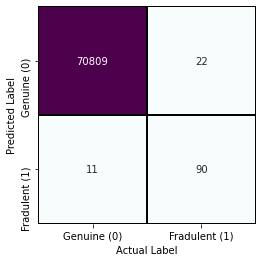

In [548]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [549]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70809    11]
 [   22    90]]
True Positive:  90
True Negative:  70809
False Positive:  11
False Negative:  22


In [550]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9995347656910845


In [551]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.00046523430891554085


In [552]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8035714285714286


In [553]:
# Specificity
print(TN / float(TN + FP))

0.9998446766450155


In [554]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.8910891089108911


In [555]:
# False Positive Rate
print(FP / float(TN + FP))

0.00015532335498446767


In [556]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.8450704225352113


In [557]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9017080526082221


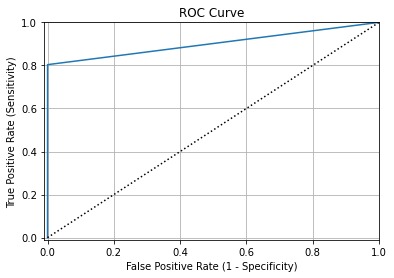

In [559]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [560]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.89      0.80      0.85       112

    accuracy                           1.00     70932
   macro avg       0.95      0.90      0.92     70932
weighted avg       1.00      1.00      1.00     70932



### With RFE

In [561]:
# Train a random forest model on the train set
rfc = RandomForestClassifier(n_estimators=200, random_state=27)
rfc.fit(X_train_rfe, y_train_smote)

RandomForestClassifier(n_estimators=200, random_state=27)

In [562]:
# Make class predictions for the test set
y_pred_class = rfc.predict(X_test_rfe)

In [563]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70807,    13],
       [   23,    89]], dtype=int64)

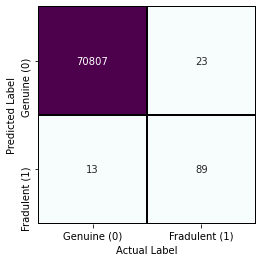

In [564]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [565]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70807    13]
 [   23    89]]
True Positive:  89
True Negative:  70807
False Positive:  13
False Negative:  23


In [566]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9994924716630011


In [567]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0005075283369988526


In [568]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7946428571428571


In [569]:
# Specificity
print(TN / float(TN + FP))

0.9998164360350184


In [570]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.8725490196078431


In [571]:
# False Positive Rate
print(FP / float(TN + FP))

0.00018356396498164361


In [572]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.8317757009345794


In [573]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8972296465889378


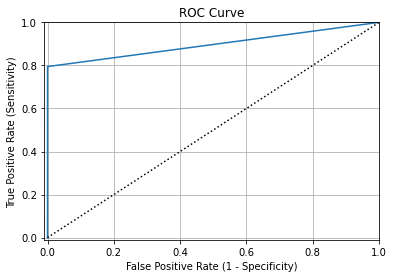

In [575]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [576]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.87      0.79      0.83       112

    accuracy                           1.00     70932
   macro avg       0.94      0.90      0.92     70932
weighted avg       1.00      1.00      1.00     70932



### With PCA

In [577]:
# Train a random forest model on the train set
rfc = RandomForestClassifier(n_estimators=200, random_state=27)
rfc.fit(X_smote_pca_15, y_train_smote)

RandomForestClassifier(n_estimators=200, random_state=27)

In [578]:
# Make class predictions for the test set
y_pred_class = rfc.predict(X_test_pca_15)

In [579]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70796,    24],
       [   23,    89]], dtype=int64)

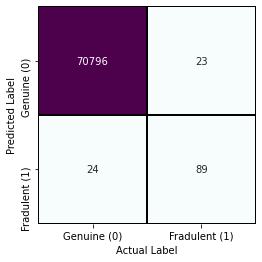

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [581]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70796    24]
 [   23    89]]
True Positive:  89
True Negative:  70796
False Positive:  24
False Negative:  23


In [582]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9993373935600294


In [583]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0006626064399706255


In [584]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7946428571428571


In [585]:
# Specificity
print(TN / float(TN + FP))

0.9996611126800339


In [586]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.7876106194690266


In [587]:
# False Positive Rate
print(FP / float(TN + FP))

0.0003388873199661113


In [588]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.7911111111111111


In [589]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8971519849114455


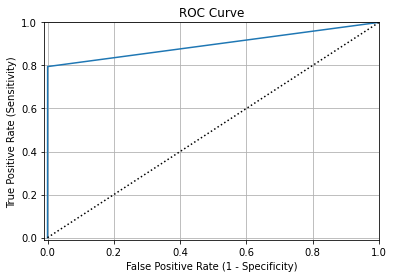

In [591]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [592]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.79      0.79      0.79       112

    accuracy                           1.00     70932
   macro avg       0.89      0.90      0.90     70932
weighted avg       1.00      1.00      1.00     70932

